# Red Neuronal Convolucional
## Parte 1: Construyendo la RNC
### Importar librerias y paquetes de keras

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


### Inicializando la RNC

In [30]:
classifier = Sequential()

### Paso 1 - Convolución

In [31]:
classifier.add(Convolution2D(
    32,                         # 32 filtros
    (3, 3),                     # filtros de 3x3
    input_shape = (150, 150, 3),  # entrada imagenes rgb 128x128
    activation = 'relu'         # no-lineal
))

### Paso 2 - Pooling

In [32]:
classifier.add(MaxPooling2D(
    pool_size = (2,2) # pooling de 2x2
    # stride por default es 2 (pool_size)
))

### EXTRA: Segunda Convolución
Tras ver los resultados con una sola convolución, se decidió añadir una segunda convolución para mejorar los resultados
- Resultados con 1 convolución   : loss: 0.5028 - acc: 0.7495 - val_loss: 0.5097 - val_acc: 0.7680
- Resultados con 2 convoluciónes : loss: 0.2288 - acc: 0.9071 - val_loss: 0.5439 - val_acc: 0.8105

In [33]:
classifier.add(Convolution2D(
    32,                         # 32 filtros
    (3, 3),                     # filtros de 3x3
    activation = 'relu'         # no-lineal
))
classifier.add(MaxPooling2D(
    pool_size = (2,2) # pooling de 2x2
    # stride por default es 2 (pool_size)
))

### Tercera convolucion

In [34]:
classifier.add(Convolution2D(
    64,                         # 64 filtros
    (3, 3),                     # filtros de 3x3
    activation = 'relu'         # no-lineal
))
classifier.add(MaxPooling2D(
    pool_size = (2,2) # pooling de 2x2
    # stride por default es 2 (pool_size)
))
# Cuarta convolucion
classifier.add(Convolution2D(
    64,                         # 64 filtros
    (3, 3),                     # filtros de 3x3
    activation = 'relu'         # no-lineal
))
classifier.add(MaxPooling2D(
    pool_size = (2,2) # pooling de 2x2
    # stride por default es 2 (pool_size)
))

### Paso 3 - Flatting

In [35]:
classifier.add(Flatten()) # keras sabe que pedo

### Paso 4 - Conexión completa

In [36]:
# Capa oculta
classifier.add(Dense(
    units = 64,         # numero de neuronas
    activation = "relu"
))
classifier.add(Dropout(0.4)) # Solo usa el 40% de las neuronas en el entrenamiento
classifier.add(Dense(
    units = 64,         # numero de neuronas
    activation = "relu"
))
classifier.add(Dense(
    units = 64,         # numero de neuronas
    activation = "relu"
))
classifier.add(Dropout(0.2)) # Solo usa el 20% de las neuronas en el entrenamiento
# Capa de salida
classifier.add(Dense(
    units = 2,             # perro o gato
    activation = 'softmax'
))

### Compilando la RNC

In [37]:
classifier.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Parte 2: Alimentando la RNC con imagenes

In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
train_datagen = ImageDataGenerator(
    rescale = 1./255,       # valores entre 0 y 1
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

checkpoint = ModelCheckpoint(
    filepath = 'ckpt/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    'dataset/train', # ubicacion de imagenes
    target_size = (150, 150), # tamaño de imagenes
    batch_size = 32,
    class_mode = 'categorical'
)
test_set = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical'
)
history = classifier.fit_generator(
    training_set,
    steps_per_epoch = 10,       # train_size / batch_size
    epochs = 100,
    validation_data = test_set,
    validation_steps = 3,       # test_size / batch_size
    workers = 10,                  # número de procesos
    callbacks = [checkpoint]
)

Found 335 images belonging to 2 classes.
Found 111 images belonging to 2 classes.
Epoch 1/100
10/10 [==============================] - 3s - loss: 0.6377 - acc: 0.5977 - val_loss: 0.5474 - val_acc: 0.7089
Epoch 2/100
10/10 [==============================] - 1s - loss: 0.5056 - acc: 0.7500 - val_loss: 0.5577 - val_acc: 0.6889
Epoch 3/100
10/10 [==============================] - 1s - loss: 0.4038 - acc: 0.8238 - val_loss: 0.5795 - val_acc: 0.6962
Epoch 4/100
10/10 [==============================] - 1s - loss: 0.3389 - acc: 0.8647 - val_loss: 0.6255 - val_acc: 0.6774
Epoch 5/100
10/10 [==============================] - 1s - loss: 0.3409 - acc: 0.8356 - val_loss: 0.4069 - val_acc: 0.8065
Epoch 6/100
10/10 [==============================] - 1s - loss: 0.3680 - acc: 0.8553 - val_loss: 0.6237 - val_acc: 0.6889
Epoch 7/100
10/10 [==============================] - 1s - loss: 0.3117 - acc: 0.8426 - val_loss: 0.3274 - val_acc: 0.8000
Epoch 8/100
10/10 [==============================] - 1s - loss: 

10/10 [==============================] - 1s - loss: 0.0229 - acc: 0.9906 - val_loss: 0.7890 - val_acc: 0.7778
Epoch 68/100
10/10 [==============================] - 1s - loss: 0.1126 - acc: 0.9716 - val_loss: 0.4263 - val_acc: 0.8889
Epoch 69/100
10/10 [==============================] - 1s - loss: 0.0489 - acc: 0.9842 - val_loss: 0.9174 - val_acc: 0.8222
Epoch 70/100
10/10 [==============================] - 1s - loss: 0.0732 - acc: 0.9780 - val_loss: 1.2308 - val_acc: 0.8222
Epoch 71/100
10/10 [==============================] - 1s - loss: 0.0420 - acc: 0.9906 - val_loss: 0.3173 - val_acc: 0.9111
Epoch 72/100
10/10 [==============================] - 1s - loss: 0.0226 - acc: 0.9969 - val_loss: 0.5857 - val_acc: 0.8444
Epoch 73/100
10/10 [==============================] - 1s - loss: 0.0300 - acc: 0.9874 - val_loss: 0.4041 - val_acc: 0.9333
Epoch 74/100
10/10 [==============================] - 2s - loss: 0.0302 - acc: 0.9842 - val_loss: 0.2388 - val_acc: 0.9355
Epoch 75/100
10/10 [=========

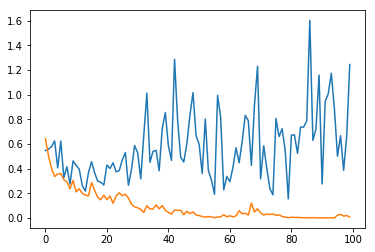

In [39]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

### Predicción

In [71]:
import numpy as np
from keras.preprocessing import image

# load image with size 64x64
test_image = image.load_img('dataset/single_prediction/majin.jpg', target_size = (150, 150))
# add color chanel dimension
test_image = image.img_to_array(test_image)
# add another dimension for the batch
test_image = np.expand_dims(test_image, 0)
result = classifier.predict(test_image)
classifier
print(result)

[[ 1.  0.]]
